## Import Library yang digunakan

In [64]:
import re
import pandas as pd
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package stopwords to /home/dapek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dapek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dapek/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [65]:
normalization_dict = {
    'gak': 'not',
    'ga': 'not',
    'g': 'not',
    'yuk': 'let us',
    'y': 'yes',
    'iya': 'yes',
    'jgn': 'do not',
    'jangan': 'do not',
    'bgt': 'very',
    'banget': 'very',
    'sdh': 'already',
    'sudh': 'already',
    'udh': 'already',
    'blm': 'not yet',
    'blum': 'not yet',
    'skrng': 'now',
    'skarang': 'now',
    'org': 'people',
    'bgs': 'good',
    'bgus': 'good',
    'mna': 'where',
    'msh': 'still',
    'msih': 'still',
    'sma': 'with',
    'sm': 'with',
    'knp': 'why',
    'kn': 'you',
    'aku': 'i',
    'gw': 'i',
    'sy': 'i',
    'km': 'you',
    'kmu': 'you',
    'kmrn': 'yesterday',
    'kmarin': 'yesterday',
    'ntar': 'later',
    'nt': 'later',
    'tdk': 'not',
    'td': 'ago',
    'brp': 'how many',
    'sbnrny': 'actually',
    'sbnrnya': 'actually',
    'smgt': 'greeting',
    'smgat': 'greeting',
    'mkin': 'more',
    'slm': 'greeting',
    'slmat': 'congratulations',
    'slmt': 'congratulations',
    'mksh': 'thank you',
    'mksih': 'thank you',
    'mkasih': 'thank you',
    'mkasi': 'thank you',
    'plg': 'return',
    'mlm': 'night',
    'mlam': 'night',
    'pgi': 'morning',
    'sg': 'afternoon',
    'bgitu': 'like that',
    'bgt': 'so',
    'bner': 'true',
    'bnr': 'true',
    'bnran': 'really',
    'bnrnya': 'actually',
    'emg': 'indeed',
    'kyk': 'like',
    'kyak': 'like',
    'kya': 'like',
    'klo': 'if',
    'klau': 'if',
    'kalo': 'if',
    'kl': 'if',
    'krn': 'because',
    'karna': 'because',
    'krna': 'because',
    'utk': 'for',
    'untk': 'for',
    'dgn': 'with',
    'dg': 'with',
    'dr': 'from',
    'dri': 'from',
    'dmn': 'where',
    'dmna': 'where',
    'kpd': 'to',
    'kpada': 'to',
    'aj': 'only',
    'aja': 'only',
    'jg': 'also',
    'jga': 'also',
    'jua': 'also',
    'u': 'you',
    'ur': 'your',
    'urs': 'yours',
    'urself': 'yourself',
    'w': 'with',
    'wo': 'without',
    'n': 'and',
    'nd': 'and',
    'plz': 'please',
    'pls': 'please',
    'thx': 'thanks',
    'thanx': 'thanks',
    'tx': 'thanks',
    'lol': 'laugh out loud',
    'lmao': 'laughing my ass off',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'brb': 'be right back',
    'gtg': 'got to go',
    'idk': 'i do not know',
    'ikr': 'i know, right',
    'omw': 'on my way',
    'ttyl': 'talk to you later',
    'wyd': 'what are you doing',
    'wywh': 'wish you were here',
    'bff': 'best friend forever',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'tb': 'thunderbolt', 
    'tbh': 'to be honest',
    'afaik': 'as far as i know',
    'fyi': 'for your information',
    'gtfo': 'get the fuck out',
    'wtf': 'what the fuck',
    'wth': 'what the hell',
    'smh': 'shaking my head',
    'rofl': 'rolling on the floor laughing',
    'gg': 'good game',
    'afk': 'away from keyboard',
    'irl': 'in real life',
    'imo': 'in my opinion',
    'ily': 'i love you',
    'ilysm': 'i love you so much',
    'hbu': 'how about you',
    'wyd': 'what are you doing',
    'wywh': 'wish you were here',
    'irl': 'in real life',
    'smh': 'shaking my head',
    'tbh': 'to be honest',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'brb': 'be right back',
    'gtg': 'got to go',
    'idk': 'i do not know',
    'ikr': 'i know, right',
    'omw': 'on my way',
    'ttyl': 'talk to you later',
    'bff': 'best friend forever',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'tb': 'thunderbolt', 
    'afaik': 'as far as i know',
    'gtfo': 'get the fuck out',
    'wtf': 'what the fuck',
    'wth': 'what the hell',
    'rofl': 'rolling on the floor laughing',
    'gg': 'good game',
    'afk': 'away from keyboard',
}

def normalisasi_kata(text):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

## Memanggil data hasil crawling lalu melihat 5 data teratas

In [66]:
file_path = f"/home/dapek/Documents/TUGAS/PEMROSESAN TEXT/SPX6900-SENTIMENT/tweets-data/spx6900.csv"

df = pd.read_csv(file_path, delimiter=",")

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1973175314974122373,Tue Sep 30 23:57:09 +0000 2025,1,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,1973175314974122373,https://pbs.twimg.com/media/G2IgfOpW4AAR6oX.jpg,NaN,en,NaN,0,1,0,https://x.com/undefined/status/1973175314974122373,1699706276966473728,NaN
1,1973136808931209396,Tue Sep 30 23:54:57 +0000 2025,1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,1973174759195288039,https://pbs.twimg.com/media/G2If-6gWoAAIjfT.jpg,CountryBitcoin,en,NaN,0,0,0,https://x.com/undefined/status/1973174759195288039,1699706276966473728,NaN
2,1973174474062307742,Tue Sep 30 23:53:49 +0000 2025,65,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,1973174474062307742,https://pbs.twimg.com/media/G2Ifuj9bcAAwRKO.jpg,NaN,en,NaN,0,2,4,https://x.com/undefined/status/1973174474062307742,2834244606,NaN
3,1973172315874832773,Tue Sep 30 23:45:14 +0000 2025,68,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,1973172315874832773,NaN,NaN,en,NaN,0,0,8,https://x.com/undefined/status/1973172315874832773,1508611559932985349,NaN
4,1973171958922813546,Tue Sep 30 23:43:49 +0000 2025,6,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,1973171958922813546,https://pbs.twimg.com/media/G2IdcIFWcAAAx1W.jpg,NaN,en,NaN,0,0,0,https://x.com/undefined/status/1973171958922813546,1833947475142385664,NaN


## mengambil kolom full_text yang ada pada spx6900.csv yang digunakan untuk pra pemrosesan data

In [67]:
texts = df["full_text"].astype(str)
texts

0                                                           Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy
1                            @CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou
2                                                                                                                                                     Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA
3       BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boom

#  Pra-Pemrosesan Data

1. **Tokenizer**  
   Digunakan untuk memecah teks menjadi kata-kata (token) dan **mengabaikan tanda baca, emoji, serta simbol**.  
   Contoh:  
   `"Spx6900 is amazing!!! 🚀💰"` → `['Spx6900', 'is', 'amazing']`

2. **Stopwords**  
   Digunakan untuk **menghapus kata-kata umum** yang tidak memiliki makna penting dalam analisis, seperti *“the”, “is”, “and”, “in”*.  
   Tujuannya agar model fokus pada kata-kata bermakna seperti *“crypto”, “market”, “price”*, dsb.

3. **Stemmer**  
   Stemmer digunakan untuk mengubah kata menjadi bentuk dasarnya (root word).  
   Misalnya, kata *“trading”* akan menjadi *“trade”*, atau *“believing”* menjadi *“believ”*.  
   Tujuan dari proses stemming adalah agar berbagai bentuk kata yang memiliki makna sama dapat dianggap sebagai satu representasi yang konsisten dalam analisis.


In [68]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

##  Data Cleaning

Fungsi `clean_text_en()` digunakan untuk melakukan **pembersihan teks (text cleaning)** pada data tweet berbahasa Inggris.  
Tujuannya adalah mengubah teks mentah dari Twitter menjadi bentuk yang lebih bersih, seragam, dan siap untuk analisis sentimen.

### Langkah-langkah Pembersihan

1. **Case Folding**  
   Semua huruf diubah menjadi huruf kecil agar konsisten dan menghindari perbedaan antara huruf besar dan kecil.  
   Contoh: *"Bitcoin"* → *"bitcoin"*.

2. **Menghapus URL dan Mention**  
   URL (tautan) dan mention seperti `@username` dihapus karena tidak memberikan makna semantik penting dalam analisis sentimen.

3. **Konversi Emoji ke Teks**  
   Emoji dikonversi menjadi bentuk teks menggunakan `emoji.demojize()`, misalnya 😀 → `:grinning_face:`.  
   Ini menjaga informasi emosional dari emoji dalam bentuk yang bisa diproses oleh teks.

4. **Menghapus Angka dan Tanda Baca**  
   Semua angka (`\d+`) dan tanda baca (`[^\w\s]`) dihapus untuk menjaga fokus pada kata yang bermakna.

5. **Normalisasi Huruf Berulang**  
   Huruf yang berulang lebih dari dua kali dikurangi menjadi satu kali untuk menghindari distorsi.  
   Contoh: *"cooool"* → *"cool"*.

6. **Penghapusan Spasi Berlebih**  
   Spasi ganda dan spasi di awal/akhir teks dihapus agar teks lebih rapi.

7. **Tokenisasi**  
   Menggunakan `RegexpTokenizer` untuk memecah kalimat menjadi kata (token) sambil mengabaikan tanda baca dan simbol.

8. **Stopword Removal**  
   Menghapus kata-kata umum (seperti “the”, “and”, “is”) yang tidak memiliki kontribusi penting terhadap makna kalimat.

9. **Stemming**  
   Mengubah kata menjadi bentuk dasarnya menggunakan **Porter Stemmer**.  
   Contoh: *"trading"*, *"traded"*, dan *"trades"* → *"trade"*.

In [69]:
def clean_text_en(text):
    text = text.lower()  
    text = re.sub(r'http\S+|www\S+', ' ', text)  # hapus URL
    text = re.sub(r'@\w+', ' ', text)            # hapus mention
    text = emoji.demojize(text)                  # ubah emoji ke teks
    text = re.sub(r'\d+', ' ', text)             # hapus angka
    text = re.sub(r'[^\w\s]', ' ', text)         # hapus tanda baca
    text = re.sub(r'(.)\1{2,}', r'\1', text)     # kurangi huruf berulang
    text = re.sub(r'\s+', ' ', text).strip()     # hapus spasi berlebih
    text = normalisasi_kata(text)                                # Normalisasi slang gaul
    words = text.split()
    words = [word for word in words if len(word) > 2]                # Hapus kata dengan panjang kurang dari 3
    text = ' '.join(words)  
    text = re.sub(r'\s+', ' ', text).strip()                         # Hapus Spasi berlebih
    
    return text

## Menampilkan dan mengkomparasi hasil text yang sudah di bersihkan dengan text awal

In [70]:
df["clean_text"] = texts.apply(clean_text_en)
df[["full_text", "clean_text"]].head()

,full_text,clean_text
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx the culture new generation the best way make very optimistic this asset movement mission till flip entire stock market stop trading and belive spx
1,@CountryBitcoin @MustStopMurad Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/tcy8Qgryou,spx the culture new generation the best way make very optimistic this asset movement mission till flip entire stock market stop trading and belive spx
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing into spx every single day until flip the stock market persist forever
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,breaking news spx has just reached market cap could this really rival the standard and poor current trajectory likely flip the boomers spx within years economists are racing understand how this phenomenon came fruition
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight yes been tough frustrating road but you are still with spx friends you are about rewarded buckle buttercups our way trillions buy dca and hold


In [71]:
# Cek duplikasi pada kolom clean_text
df['clean_text'].duplicated().sum()

np.int64(93)

In [72]:
# Hapus duplikasi
df.drop_duplicates(subset=['clean_text'], inplace=True)
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")

Jumlah data setelah menghapus duplikat: 1407


## Menampilkan Data Secara Lengkap di Pandas

Secara default, Pandas akan memotong (*truncate*) teks yang terlalu panjang pada saat ditampilkan di output.  
Untuk melihat teks tweet secara penuh (tanpa terpotong) maka dilakukan pelebaran pada rows

In [73]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
df[["full_text", "clean_text"]].head(10)

,full_text,clean_text
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx the culture new generation the best way make very optimistic this asset movement mission till flip entire stock market stop trading and belive spx
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing into spx every single day until flip the stock market persist forever
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,breaking news spx has just reached market cap could this really rival the standard and poor current trajectory likely flip the boomers spx within years economists are racing understand how this phenomenon came fruition
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight yes been tough frustrating road but you are still with spx friends you are about rewarded buckle buttercups our way trillions buy dca and hold
5,The girl is always cute $SPX #SPX6900 https://t.co/qF6RnHy2Uc,the girl always cute spx spx
6,Beautiful wisdom ️ #SPX6900 #spiritualgold,beautiful wisdom spx spiritualgold
7,Have you ever had a job and do you own SPX6900?,have you ever had job and you own spx
8,@dotkrueger Glad you are so bullish on #SPX6900 Fred. Thank you,glad you are bullish spx fred thank you
9,BELIEVE IN SOMETHING BELIEVE IN SOMETHING #SPX6900 https://t.co/t7ViwLy3Ip,believe something believe something spx
10,DCA daily. Show up daily. Been doing so for 101 days. #SPX6900 will shock the world. https://t.co/66P7DkcsnL,dca daily show daily been doing for days spx will shock the world


# Bi-gram & Tri-gram

In [74]:
import pandas as pd 
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 

# 1. Gabungkan semua teks yang telah dibersihkan
all_clean_text = ' '.join(df['clean_text'])

# 2. Tokenisasi teks menjadi daftar kata
tokens = word_tokenize(all_clean_text)

# --- Analisis Bi-gram ---
# 3. Hasilkan bi-gram (pasangan kata)
bigrams = list(ngrams(tokens, 2))

# 4. Hitung frekuensi kemunculan bi-gram
bigram_freq = Counter(bigrams)

# 5. Ambil N bi-gram paling umum (misalnya 10 teratas)
top_n = 10
top_bigrams = bigram_freq.most_common(top_n)

# 6. Tampilkan hasil bi-gram dalam format yang lebih rapi dan informatif
print(f"--- Top {top_n} Bi-gram Paling Umum ---")
print(f"{'Rank':<4} {'Bi-gram':<30} {'Frekuensi':<10}")
print("-" * 45)
for i, (bigram, freq) in enumerate(top_bigrams, start=1):
    # Gabungkan kata dalam bi-gram dengan spasi
    bigram_str = ' '.join(bigram)
    print(f"{i:<4} {bigram_str:<30} {freq:<10}")

print("\n") # Jarak tambahan

# --- Analisis Tri-gram ---
# 7. Hasilkan tri-gram (tiga kata berturut-turut)
trigrams = list(ngrams(tokens, 3))

# 8. Hitung frekuensi kemunculan tri-gram
trigram_freq = Counter(trigrams)

# 9. Ambil N tri-gram paling umum
top_trigrams = trigram_freq.most_common(top_n)

# 10. Tampilkan hasil tri-gram dalam format yang lebih rapi dan informatif
print(f"--- Top {top_n} Tri-gram Paling Umum ---")
print(f"{'Rank':<4} {'Tri-gram':<40} {'Frekuensi':<10}")
print("-" * 55)
for i, (trigram, freq) in enumerate(top_trigrams, start=1):
    # Gabungkan kata dalam tri-gram dengan spasi
    trigram_str = ' '.join(trigram)
    print(f"{i:<4} {trigram_str:<40} {freq:<10}")

# Simpan hasil ke DataFrame untuk analisis lebih lanjut
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bi-gram', 'Frekuensi'])
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Tri-gram', 'Frekuensi'])
df_top_bigrams.to_csv('/home/dapek/Documents/TUGAS/PEMROSESAN TEXT/SPX6900-SENTIMENT/tweets-data/top_bigrams.csv', index=False)
df_top_trigrams.to_csv('/home/dapek/Documents/TUGAS/PEMROSESAN TEXT/SPX6900-SENTIMENT/tweets-data/top_trigrams.csv', index=False)

--- Top 10 Bi-gram Paling Umum ---
Rank Bi-gram                        Frekuensi 
---------------------------------------------
1    spx spx                        134       
2    spx the                        94        
3    persist forever                63        
4    spx will                       55        
5    believe something              53        
6    stock market                   48        
7    the spx                        48        
8    into spx                       46        
9    spx and                        42        
10   the stock                      41        


--- Top 10 Tri-gram Paling Umum ---
Rank Tri-gram                                 Frekuensi 
-------------------------------------------------------
1    the stock market                         41        
2    flip the stock                           25        
3    believe something spx                    22        
4    stop trading and                         21        
5    whale token purcha

# Wordcloud

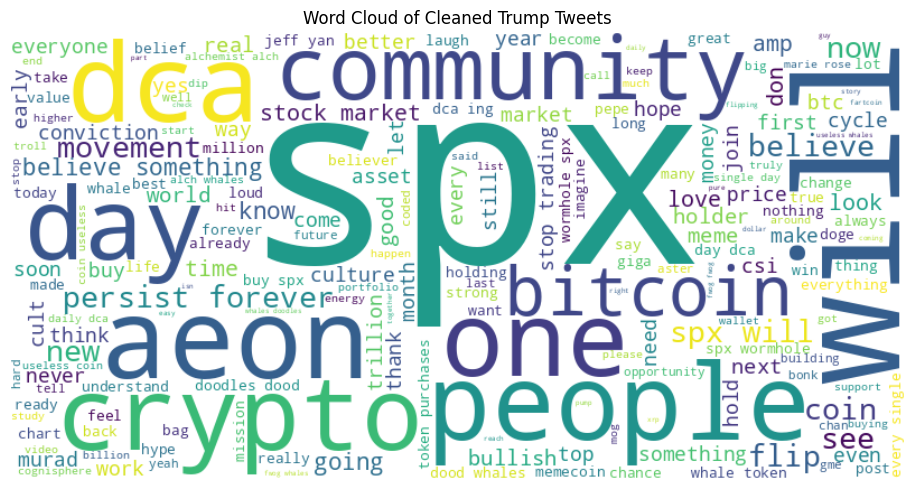

In [75]:
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_for_wordcloud)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Cleaned Trump Tweets')
plt.tight_layout()
plt.show()

## 💬 Analisis Sentimen Menggunakan VADER

Tahap selanjutnya adalah melakukan **analisis sentimen** pada teks yang telah dibersihkan.  
Dalam tahap ini digunakan **VADER (Valence Aware Dictionary and sEntiment Reasoner)** — salah satu metode *lexicon-based sentiment analysis* yang populer dan efektif untuk teks berbahasa Inggris, termasuk data media sosial seperti Twitter.

## Kelebihan:
1. **Tidak butuh data training (unsupervised).** 

2. **Mudah diterapkan pada tweet berbahasa Inggris.**

3. **VADER dibuat khusus untuk teks media sosial (ada pengenalan emotikon, kapitalisasi, tanda seru, dll).**

4. **Cepat, ringan, dan hasilnya cukup akurat.**


In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

def categorize(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment_score"].apply(categorize)

df[["full_text", "clean_text", "sentiment_score", "sentiment_label"]].head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dapek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,full_text,clean_text,sentiment_score,sentiment_label
0,Spx6900 the culture of a new generation is the best way to make it. Im very optimistic on this asset (Movement) a Mission till we flip entire stock market Stop Trading and Belive in #Spx6900 https://t.co/7Zm3gp5tPy,spx the culture new generation the best way make very optimistic this asset movement mission till flip entire stock market stop trading and belive spx,0.8315,positive
2,Day 19 of DCA'ing $10 into #SPX6900 every single day until we flip the stock market. Persist Forever https://t.co/7BcT9Ut6kA,day dca ing into spx every single day until flip the stock market persist forever,0.0000,neutral
3,BREAKING NEWS #SPX6900 has just reached a $1T market cap. Could this really rival the standard and poor's 500? At it's current trajectory it is likely to flip the boomers $SPX within 4 years. Economists are racing to understand how this phenomenon came to fruition.,breaking news spx has just reached market cap could this really rival the standard and poor current trajectory likely flip the boomers spx within years economists are racing understand how this phenomenon came fruition,-0.4019,negative
4,Hold on tight! Yes it s been a tough frustrating road but if you are still with us my #SPX6900 friends you are about to be rewarded. Buckle up buttercups on our way to $Trillions. Buy DCA and Hold https://t.co/qLjkxIGubS,hold tight yes been tough frustrating road but you are still with spx friends you are about rewarded buckle buttercups our way trillions buy dca and hold,0.8442,positive
5,The girl is always cute $SPX #SPX6900 https://t.co/qF6RnHy2Uc,the girl always cute spx spx,0.4588,positive
6,Beautiful wisdom ️ #SPX6900 #spiritualgold,beautiful wisdom spx spiritualgold,0.8074,positive
7,Have you ever had a job and do you own SPX6900?,have you ever had job and you own spx,0.0000,neutral
8,@dotkrueger Glad you are so bullish on #SPX6900 Fred. Thank you,glad you are bullish spx fred thank you,0.6705,positive
9,BELIEVE IN SOMETHING BELIEVE IN SOMETHING #SPX6900 https://t.co/t7ViwLy3Ip,believe something believe something spx,0.0000,neutral
10,DCA daily. Show up daily. Been doing so for 101 days. #SPX6900 will shock the world. https://t.co/66P7DkcsnL,dca daily show daily been doing for days spx will shock the world,-0.3818,negative


## Visualisasi Data hasil Scoring

In [77]:
print(df["sentiment_label"].value_counts())

sentiment_label
positive    669
neutral     533
negative    205
Name: count, dtype: int64


/tmp/ipykernel_8113/86873433.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')
/tmp/ipykernel_8113/86873433.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x='sentiment_label', order=['positive','neutral','negative'],


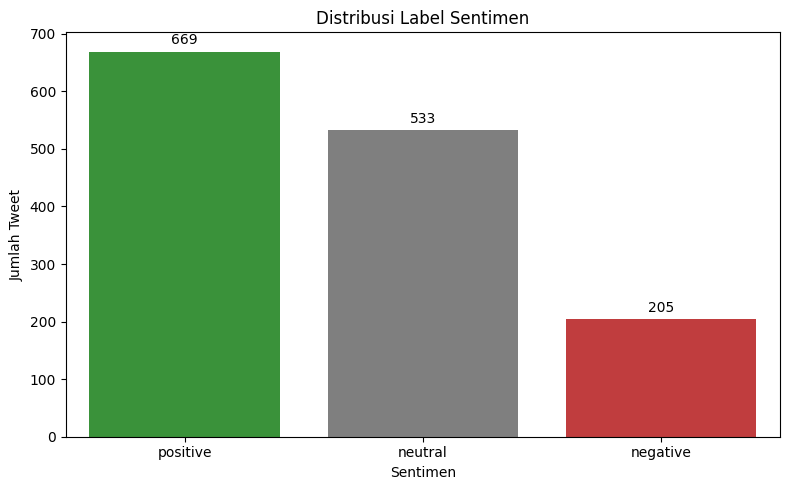

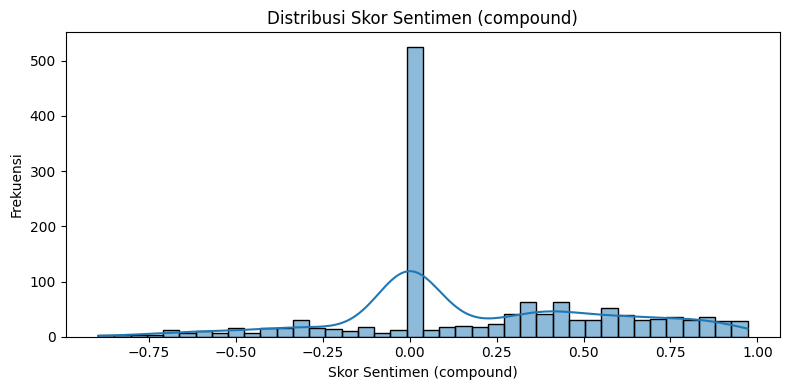

In [79]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pastikan kolom tanggal dalam format datetime
df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')

# 1) Distribusi label sentimen (count)
plt.figure(figsize=(8,5))
ax1 = sns.countplot(data=df, x='sentiment_label', order=['positive','neutral','negative'],
          palette={'positive':'#2ca02c','neutral':'#7f7f7f','negative':'#d62728'})
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
# tambahkan anotasi jumlah di atas bar
for p in ax1.patches:
  ax1.annotate(format(int(p.get_height()), ','), 
         (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Histogram/Distribusi skor sentiment (compound)
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment_score'], bins=40, kde=True, color='#1f77b4')
plt.title('Distribusi Skor Sentimen (compound)')
plt.xlabel('Skor Sentimen (compound)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


# Kesimpulan 
Berdasarkan hasil analisis sentimen terhadap tweet yang mengandung kata kunci SPX, dapat disimpulkan bahwa:

- Sentimen positif menunjukkan bahwa sebagian warganet memiliki pandangan optimis terhadap coin SPX, misalnya dengan menilai proyeknya menjanjikan atau mendukung pergerakan harganya.

- Sentimen negatif merepresentasikan adanya keraguan, kritik, atau pandangan pesimis terhadap coin SPX, seperti menyoroti volatilitas, kepercayaan rendah, atau kekecewaan terhadap performanya.

- Sentimen netral umumnya berupa tweet informatif, berita, atau pembahasan teknis tanpa emosi yang kuat — misalnya sekadar menyebutkan harga, update pasar, atau analisis objektif.
